In [41]:
#make the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [42]:
#read historical data from MT4 that were saved to csv file
df = pd.read_csv("GBPUSD30.csv")

In [43]:
#number of days and standard deviation to use for rolling lookback period for computing th BBands
window = 24
no_std = 2

#Calculate rolling mean and rolling standard deviation
rolling_mean = df["Close"].rolling(window).mean()
rolling_std = df["Close"].rolling(window).std()

#create two new DataFrame columns to hold values of upper and lower Bollinger bands
df['Rolling Mean'] = rolling_mean
df['Bollinger High'] = rolling_mean + (rolling_std*no_std)
df['Bollinger Low'] = rolling_mean - (rolling_std*no_std)

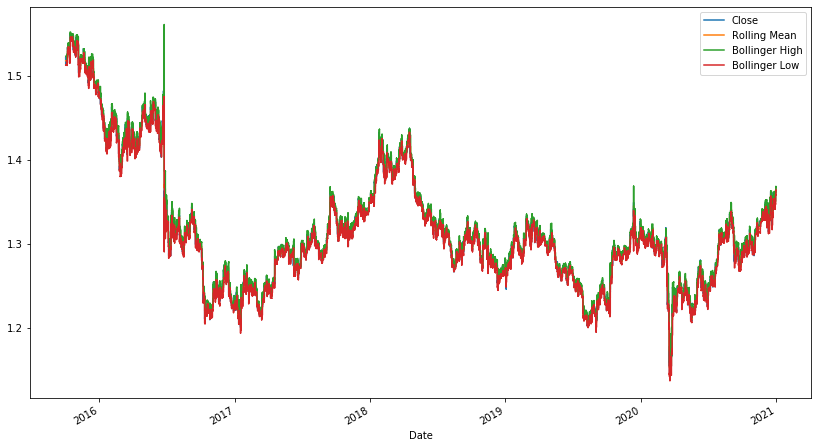

In [44]:
#Plot a graph with our Bollinger Bands and data to have a visual insight
df['Date'] = pd.to_datetime(df["Date"])
df.plot(x='Date', y=['Close', 'Rolling Mean', 'Bollinger High', 'Bollinger Low'], figsize=(14,8))
plt.show()

C:\Users\evang\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


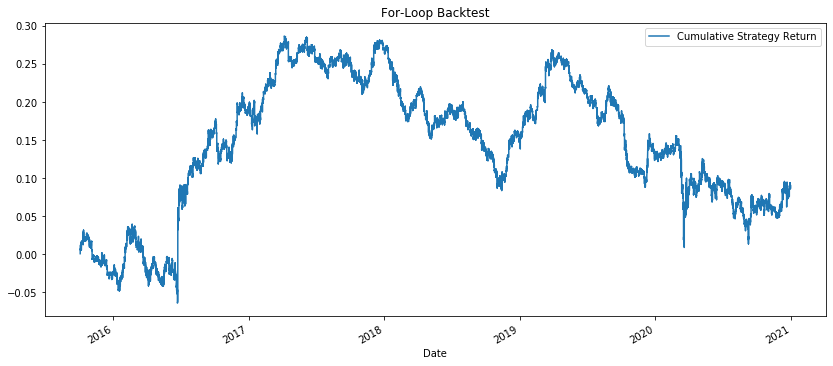

In [53]:
#Implement Trading strategy(BBANDS)
#We go short (-1) when the price hits the upper band and go long(+1) when the price hits the low band
#Create an empty column for our position signals
df["Signal"] = None

for row in range(1, len(df)):
    
    if (df["Close"].iloc[row]>df["Bollinger High"].iloc[row]) and (df["Close"].iloc[row-1]<df["Bollinger High"].iloc[row-1]) and (df["RSI"].iloc[row-1]>60):
        df["Signal"].iloc[row] = -1
    if (df["Close"].iloc[row]<df["Bollinger Low"].iloc[row]) and (df["Close"].iloc[row-1]>df["Bollinger Low"].iloc[row-1]) and (df["RSI"].iloc[row-1]<40) :
        df["Signal"].iloc[row] = 1
#replace the Nones in the Signal column with the last non-none value (signal/position) to represent the holding of our position      
df["Signal"].fillna(method="ffill", inplace=True)

#Calculate the daily market return and multiply that by the position to determine strategy returns
#and create a new column Market Return and Strategy Return
df['Market Return'] = np.log(df['Close'] / df['Close'].shift(1))
df['Strategy Return'] = df['Market Return'] * df['Signal'].shift(1)

#Plot (cumulative) strategy returns
df["Cumulative Strategy Return"]=df["Strategy Return"].cumsum()
df.plot(x="Date", y="Cumulative Strategy Return", figsize=(14,6))
plt.title("For-Loop Backtest")
plt.show()

# Trading Strategy Function

In [48]:
def bbands_strategy(df, window, no_std):
    #Calculate rolling mean and rolling standard deviation
    rolling_mean = df["Close"].rolling(window).mean()
    rolling_std = df["Close"].rolling(window).std()

    #create two new DataFrame columns to hold values of upper and lower Bollinger bands
    df['Rolling Mean'] = rolling_mean
    df['Bollinger High'] = rolling_mean + (rolling_std * no_std)
    df['Bollinger Low'] = rolling_mean - (rolling_std * no_std)
    
    df["Signal"] = None

    for row in range(1, len(df)):
    
        if (df["Close"].iloc[row]>df["Bollinger High"].iloc[row]) and (df["Close"].iloc[row-1]<df["Bollinger High"].iloc[row-1]):
            df["Signal"].iloc[row] = -1
        if (df["Close"].iloc[row]<df["Bollinger Low"].iloc[row]) and (df["Close"].iloc[row-1]>df["Bollinger Low"].iloc[row-1]):
            df["Signal"].iloc[row] = 1
    
    #replace the Nones in the Signal column with the last non-none value (signal/position) to represent the holding of our position      
    df["Signal"].fillna(method="ffill", inplace=True)

    #Calculate the daily market return and multiply that by the position to determine strategy returns
    #and create a new column Market Return and Strategy Return
    df['Market Return'] = np.log(df['Close']/ df['Close'].shift(1))
    df['Strategy Return'] = df['Market Return'] * df['Signal'].shift(1)   #current period position is determined by previous period's signal

    #Plot strategy returns
    df["Cumulative Strategy Return"]=df["Strategy Return"].cumsum()
    df.plot(x="Date", y="Cumulative Strategy Return", figsize=(14,6))
    plt.title("For-Loop Backtest")
    plt.show()

C:\Users\evang\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


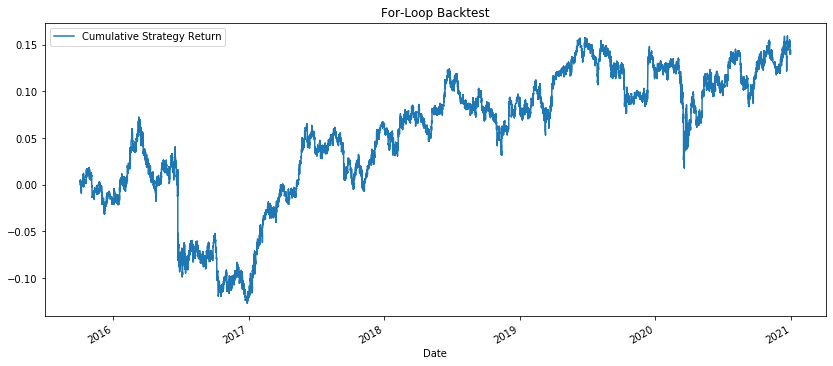

In [49]:
#try different rolling windows and number of stdvs
bbands_strategy(df, 30, 2)